Écrivez votre nom et numéro d'étudiant.

TP 2 : Conversion d'espaces couleurs
=============

Introduction au sujet
-----

L'objectif de ce TP est de découvrir comment l'information est codée dans les différents espaces couleurs et de boucler avec le TP précédent en faisant un k-mean dans un espace particulier.

**Afin d'avoir un code optimisé, vous éviterez d'utiliser les instructions python3 if, for et while (sauf mention contraire dans les sujets).**

Le code est à écrire en python3 à la suite des questions dans ce fichier. Vous appuierez soit sur le bouton *run cell*, soit sur les touches *Ctrl-Entrée*, à l’intérieur de la zone de saisie, pour lancer l'exécution de vos commandes. Si la commande est en cours d’exécution une étoile apparaît à côté de la zone de saisie de la commande : In [\*]. Une fois le calcul achevé, l'étoile est remplacée par le numéro du run permettant de retrouver par la suite dans quel ordre ont été lancés chaque bloc.

Commencez par importer les librairies nécessaires au TP. Les dernières lignes sont spécifiques à l'usage d'un notebook. Elle permet d'indiquer que les affichages matplotlib doivent être fait dans le notebook et non dans une fenêtre extérieur. 

In [36]:
import numpy as np
import scipy as sc
import scipy.ndimage
import scipy.spatial.distance

import matplotlib.pyplot as plt
import skimage as sk

#Affichage des images matplotlib dans le notebook
%matplotlib inline
#Centrage des images dans la fenetre du navigateur.
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

1 - Lecture d'une image de référence et analyse en RGB
--------

En utilisant la fonction *imread* de la librairie matplotlib, lisez l'image *fleurs.ppm* qui vous a été fournis. Vous mettrez l'image dans une variable *image*. Par défaut une image couleur et vu comme un tableau de pixels RGB.

[[[212 107  85]
  [201  99  80]
  [205 105  90]
  ...
  [188  73  33]
  [194  79  41]
  [197  82  46]]

 [[212 107  87]
  [202  99  83]
  [210 109  96]
  ...
  [184  69  29]
  [191  76  38]
  [195  80  44]]

 [[207 101  84]
  [204 101  87]
  [214 114 105]
  ...
  [182  68  25]
  [189  74  34]
  [193  78  40]]

 ...

 [[206 150 182]
  [205 147 188]
  [209 150 195]
  ...
  [199 117 123]
  [187 104 105]
  [187 105 100]]

 [[208 154 186]
  [206 149 187]
  [210 152 194]
  ...
  [196 115 129]
  [197 114 125]
  [202 120 125]]

 [[209 157 186]
  [207 153 188]
  [212 157 195]
  ...
  [210 129 152]
  [217 135 154]
  [217 136 150]]]


(416, 462, 3)

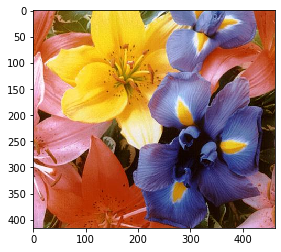

In [37]:
a= plt.imread("fleurs.ppm")
plt.imshow(a)
print(a)
im = np.asarray(a)
#print(a)
im.shape
#np.shape(im)

Les valeurs de *image* sont entre 0 et 255, ramenez ces valeurs entre 0 et 1.

In [38]:
image = a/255
print(image)

[[[0.83137255 0.41960784 0.33333333]
  [0.78823529 0.38823529 0.31372549]
  [0.80392157 0.41176471 0.35294118]
  ...
  [0.7372549  0.28627451 0.12941176]
  [0.76078431 0.30980392 0.16078431]
  [0.77254902 0.32156863 0.18039216]]

 [[0.83137255 0.41960784 0.34117647]
  [0.79215686 0.38823529 0.3254902 ]
  [0.82352941 0.42745098 0.37647059]
  ...
  [0.72156863 0.27058824 0.11372549]
  [0.74901961 0.29803922 0.14901961]
  [0.76470588 0.31372549 0.17254902]]

 [[0.81176471 0.39607843 0.32941176]
  [0.8        0.39607843 0.34117647]
  [0.83921569 0.44705882 0.41176471]
  ...
  [0.71372549 0.26666667 0.09803922]
  [0.74117647 0.29019608 0.13333333]
  [0.75686275 0.30588235 0.15686275]]

 ...

 [[0.80784314 0.58823529 0.71372549]
  [0.80392157 0.57647059 0.7372549 ]
  [0.81960784 0.58823529 0.76470588]
  ...
  [0.78039216 0.45882353 0.48235294]
  [0.73333333 0.40784314 0.41176471]
  [0.73333333 0.41176471 0.39215686]]

 [[0.81568627 0.60392157 0.72941176]
  [0.80784314 0.58431373 0.73333333]


In [39]:
np.min(image)==0,np.max(image)==1.

(True, True)

A l'aide de la fonction *imshow* de matplotilb, visualisez cette image. 

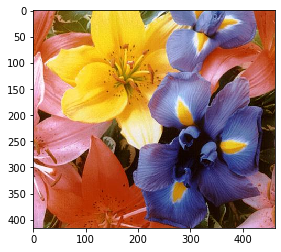

In [40]:
plt.imshow(a)

Testez le code suivant qui masque les composantes verte et bleue de l'image pour ne garder que la composante rouge. L'affichage de gauche correspond à l'image en ne gardant que la composante rouge et en supprimant le vert et le bleu (valeurs mise à 0). L'image de droite permet de visualiser l'intensité du rouge dans l'image à l'aide de niveau de gris. Elle représente la même information que l 'image de gauche. Une zone vu en blanc correspond à une forte composante rouge dans l'image d'origine alors qu'une zone sombre correspond à l'absence de rouge. Que pouvez-vous dire pour la partie jaune de l'image d'origine ? 

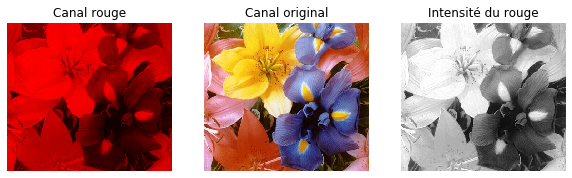

In [41]:
fig, [im_rouge,a,im_composante_rouge] = plt.subplots(1, 3, figsize=(10,10))

masque_rouge = image*np.array([1.0,0.0,0.0])
im_rouge.imshow(masque_rouge)
im_rouge.set_title('Canal rouge')
im_rouge.axis('off')
masque_a = image*np.array([1.0,1.0,1.0])
a.imshow(masque_a)
a.set_title('Canal original')
a.axis('off')
im_composante_rouge.imshow(image[:,:,0],cmap='gray')
im_composante_rouge.set_title('Intensité du rouge')
im_composante_rouge.axis('off')
plt.show()

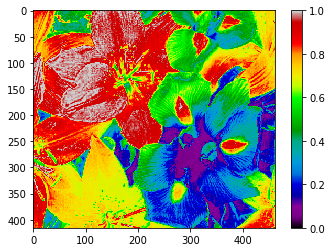

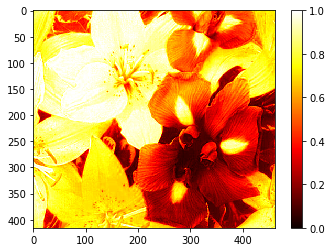

In [42]:
plt.imshow(image[:,:,0],cmap='nipy_spectral')
plt.colorbar()
plt.show()
plt.imshow(image[:,:,0],cmap='hot')
plt.colorbar()
plt.show()

Double cliquez ici et écrivez la réponse à la question. Notice that for yellow straws, both red and green components are active, but the blue component is missing (black in color). The pixel values would be closer to[255, 255, 0] .
White color in RGB image would be represented as [255, 255, 255]. Grey pixels in the RGB image will have the same value for all components. When we take the average of all three values, we get the same number. For example, a grey value [57, 57, 57] in RGB will have value 57 in a greyscale image. We discussed about converting an RGB image to greyscale in the first post.


Faites de même pour afficher la composante verte puis la composante bleue. 

(-0.5, 461.5, 415.5, -0.5)

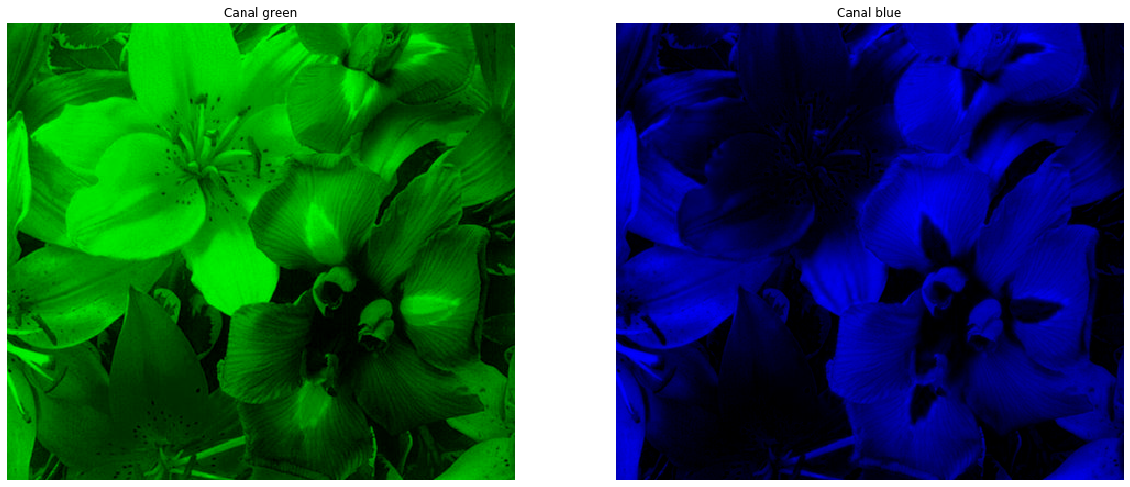

In [43]:
fig, [green,blue] = plt.subplots(1, 2, figsize=(20,10))
masque_green = image*np.array([0.0,1.0,0.0])
green.imshow(masque_green)
green.set_title('Canal green')
green.axis('off')
masque_blue = image*np.array([0.0,0.0,1.0])
blue.imshow(masque_blue)
blue.set_title('Canal blue')
blue.axis('off')

Affichez une image en couleur où vous supprimez uniquement la composante bleu. Que pouvez vous dire sur la partie jaune de l'image. A votre avis à quel code RGB peut correspondre le jaune ? Même question pour le blanc et le noir.


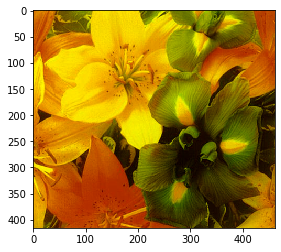

In [44]:
#Ecrivez votre code ici
masque_green_red = image*np.array([1.0,1.0,0.0])
green.imshow(masque_green_red)
green.set_title('Canal green and red')
green.axis('off')
plt.imshow(masque_green_red)

(416, 462, 3)

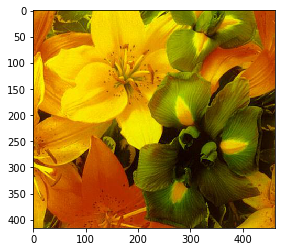

In [45]:
import imageio
image1 = imageio.imread('fleurs.ppm')
"""
imageio.imwrite('red.jpg', image[:, :, 0])
imageio.imwrite('green.jpg', image[:, :, 1])
imageio.imwrite('blue.jpg', image[:, :, 2])
red_image = image.copy()
red_image[:, :, 1] = 0
red_image[:, :, 2] = 0
imageio.imwrite('red_image.jpg', red_image)
blue_image = image.copy()
blue_image[:, :, 1] = 0
blue_image[:, :, 0] = 0
imageio.imwrite('blue_image.jpg', blue_image)
"""
red_green_image = image1.copy()
red_green_image[:, :, 2] = 0
#green_image[:, :, 0] = 0
imageio.imwrite('green_image.jpg', red_green_image)
a= imageio.imread('green_image.jpg')
plt.imshow(a)
np.shape(a)
#image[:, :, 1].shape

Écrivez la réponse à la question ici.  

* this is the description that I must add before answer this question

What we  extracts  just a single channel with code  "   rgb_image[:,:,1] =green " or "rgb_image[:,:,0]=red " or "rgb_image[:,:,2]=blue " it means this shows  how much green, red or blue colour each pixel has. This will ultimately be visualized as a grayscale image where darker pixels denote that there isn't much "greenness" at those points and lighter pixels denote that there is a high amount of "greenness" at those points.

if we wish to visualize the "green" or "blue"(for example) each colour. In that case, set both the red and blue channels to zero and leave the blue  channel intact with this code :  blue_image[:, :, 1] = 0
blue_image[:, :, 0] = 0

* end of descriptions


* answer the question:
if we apply with second code to visualise image with code with previous part, it means that we don't have blue pixels. and only green and red we have. yellow color range are more near to white, so their yellow color (red=255, green=255 ,blue=0)  so yellow colors will be remain with same intensity like original image , white colors will be change to yellow. because  white color are (red=255 green=255 , blue=255)) and we make blue to zero. for dark points (red=0 green=0 blue=0)  for this exercise they will remain dark and same original too.

2- Passage d'un espace couleur à un autre (de l'espace RGB à l'espace $I_1I_2I_3$)
-----

L'espace $I_1I_2I_3$ a été introduit par Otha et al en 1980 pour représenter la couleur par 3 dimensions décorrélé. Cela part du constat que la plupart de l'information couleur des images "naturelles" peut être presque représentée par seulement deux composantes couleurs. L'espace $I_1I_2I_3$ cherchent donc à mettre l'essentielle de l'information dans les premières dimensions. 

L'espace $I_1I_2I_3$ se déduit de l'espace $RGB$ par la transformation:
$$
\begin{eqnarray}
I_1&=&\frac{R+G+B}{3}\\
I_2&=&R-B\\
I_3&=&G-\frac{R+G}{2}
\end{eqnarray}
$$

Ces opérations sont équivalentes à effectuer l'opération matricielle suivante:

$$
\left(\begin{array}{ccc} 
I_1&
I_2&
I_3
\end{array}\right)=
\left(\begin{array}{ccc} 
R&
G&
B
\end{array}\right)T
\text{ avec }
T = \left(\begin{array}{ccc} 
\frac{1}{3}&1&-\frac{1}{2}\\
\frac{1}{3}&0&1\\
\frac{1}{3}&-1&-\frac{1}{2}\\
\end{array}\right)
$$ 

Déclarez la matrice $T$ dans un tableau, puis à l'aide d'un produit matriciel sur l'image transformer l'image RGB en image dans l'espace $I_1 I_2 I_3$. Vous stockerez la nouvelle image dans une variable *i1i2i3*. Vous pourrez vérifier votre transformation en visualisant l'image $I_1$ qui doit correspondre à une image de luminance (niveaux de gris).

U1:  (3, 416, 462, 3)
U2:  (3, 416, 462, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 461.5, 415.5, -0.5)

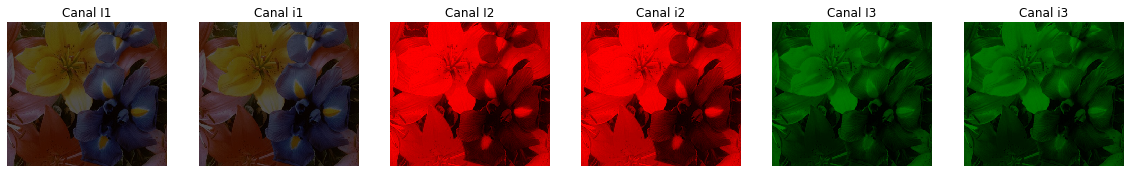

In [46]:



R =image*np.array([1.0,0.0,0.0])
G = image*np.array([0.0,1.0,0.0])
B = image*np.array([0.0,0.0,1.0])
I1= (R+G+B)/3
I2= (R-B)
I3= (G - ((R+G)/2))

U1=[R, G, B]
print("U1: ",np.shape(U1))
U2=[I1, I2, I3]
print("U2: ",np.shape(U2))
i1=((R/3)+(B/3)+(G/3))
i2=(R-B)
i3=  (-((R/2)+(B)-(G/2)))

fig, [a,b,c,d,e,f] = plt.subplots(1, 6, figsize=(20,10))
a.imshow(I1)
a.set_title('Canal I1')
a.axis('off')
b.imshow(i1)
b.set_title('Canal i1')
b.axis('off')
c.imshow(I2)
c.set_title('Canal I2')
c.axis('off')
d.imshow(i2)
d.set_title('Canal i2')
d.axis('off')
e.imshow(I3)
e.set_title('Canal I3')
e.axis('off')
f.imshow(i3)
f.set_title('Canal i3')
f.axis('off')

La fonction *scipy.linalg.inv* permet de calculer l'inversion d'une matrice. Pour revenir dans l'espace RGB depuis $I_1 I_2 I_3$, il suffit d'appliquer la transformation inverse, ce qui correspond à une multiplication par l'inverse de la matrice T. Inversez donc la transformation sur i1i2i3 sans l'afficher. Vous stockerez le résultat dans une matrice nommée rgb.

NameError: name 'i11' is not defined

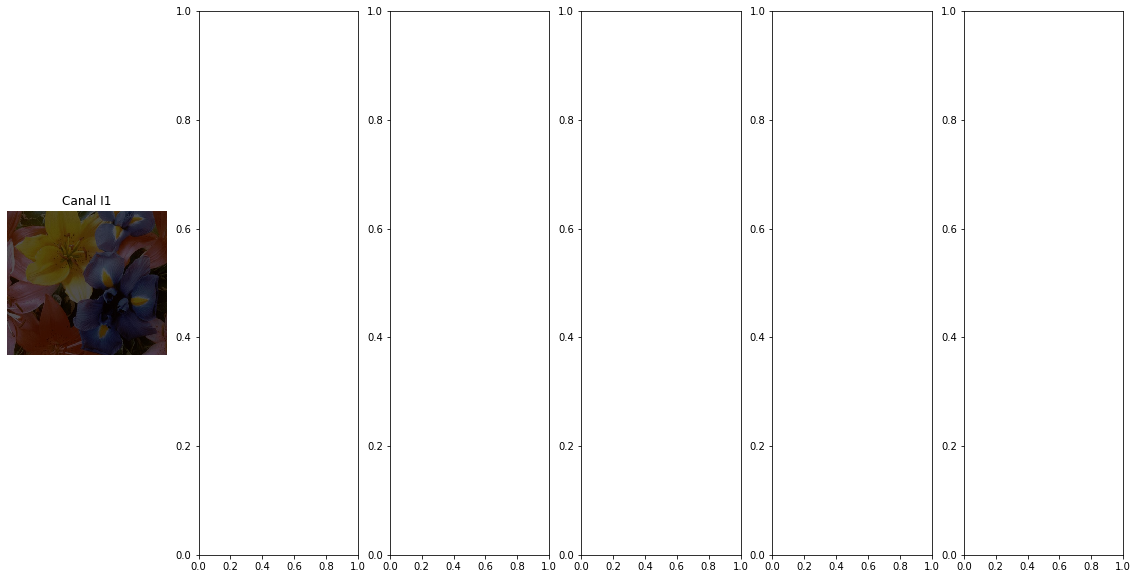

In [15]:
i11=
i22=
i33=
fig, [g,h,i,j,k,l] = plt.subplots(1, 6, figsize=(20,10))
g.imshow(i1)
g.set_title('Canal I1')
g.axis('off')
h.imshow(i11)
h.set_title('Canal i1')
h.axis('off')
i.imshow(i2)
i.set_title('Canal I2')
i.axis('off')
j.imshow(i22)
j.set_title('Canal i2')
j.axis('off')
k.imshow(i3)
k.set_title('Canal I3')
k.axis('off')
l.imshow(i33)
l.set_title('Canal i3')
l.axis('off')

 Il est possible que lors du calcul de la question précédente, certaines approximation dans les calculs entrainent que les valeurs ne soient pas parfaitement comprise enter 0 et 1 ce qui posera des problèmes lors de l'affichage. Le code suivant permet de supprimer les valeurs extrêmes issues de ces approximations.

In [235]:
r= i11
g= i22
b= i33
rgb= np.array[r,g,b]
#rgb=np.concatenate((r,g, b), axis=0)
print(np.min(rgb),np.max(rgb))
rgb[rgb<0]=0
rgb[rgb>1]=1

TypeError: 'builtin_function_or_method' object is not subscriptable

In [291]:
from PIL import Image
arr = np.random.uniform(size=(416, 462, 3))
print("I1: ",np.shape(arr[:,:,1]))
arr[:,:,0] = I1
arr[:,:,1] = I2
arr[:,:,2] = I3








I1:  (416, 462)


ValueError: could not broadcast input array from shape (416,462,3) into shape (416,462)

Affichez l'image *rgb*, retrouvez-vous l'image d'origine ? 

In [276]:
# Écrivez votre code ici.

Écrivez la répone à la question ici

Construisez une image en suivant les étapes suivantes:
1. Passez dans l'espace $I_1 I_2 I_3$,
2. Mettez à zéro le canal $I_3$,
3. Revenez en RGB et afficher l'image obtenue.

Faites de même en mettant à zéro le canal *I_1* et en gardant les deux autres canaux originaux. Que pouvez-vous dire de l'information que vous percevez de l'image ? 

In [4]:
# Écrivez votre code ici.

Écrivez la répone à la question ici

3- Généralisation à d'autres espaces couleur
-------------

La librairie scikit-image de python permet de facilement passer d'un espace couleur à l'autre. En lisant la [documentation du module *color*](http://scikit-image.org/docs/dev/api/skimage.color.html), réalisez une figure affichant les différentes composantes de l'image d'entré en $RGB$, $XYZ$, $LAB$, $LUV$, $YIQ$,$HSV$ et $I_1I_2I_3$ (utilisez le code de la section précédente). Les images seront visualisées sous la forme d'un tableau d'images comprenant 8 lignes (dont une ligne pour l'image originale) et 3 colonnes. Dans chaque colonne vous visualiserez les trois composantes de chaque espace couleur en niveau de gris. Aussi de chaque image, vous indiquerez le nom de la composante quelle représente. Vous pouvez utilisez des boucles *for* pour cette question.

In [16]:
from skimage.color import *
img_gray = rgb2gray(image)
img_xyz = rgb2xyz(image)
img_lab = rgb2lab(image)
img_luv = rgb2luv(image)
img_yiq = rgb2yiq(image)
img_hsv = rgb2hsv(image)
plt.imshow(img_hsv)
plt.show()



NameError: name 'rgb2luv' is not defined

Repérez les images de luminance. À partir des équations décrivant les différentes espaces couleur essayez de voir quel type d'information est présent dans chaque image. 

En quoi l'espaces $RGB$ est-il singulier parmi les espaces susmentionnés ? 

Répondez ici à la question

4- Étude des effets de la détérioration de différents canaux d'une image
---------

La composante de luminance est la composante qui contient généralement le plus d'informations. En conséquence les algorithmes de compression d'images ou de vidéos compressent de façon plus marquée les autres canaux. Nous allons dans cette partie, visualiser l'impact que peut avoir une perte d'information sur les canaux de l'espace couleur $YIQ$. Cet espace couleur a été utilisé dans les télévisions analogique nord américaines pour transmettre les informations de luminance et de couleurs. 

Pour visualiser ce point, reprenez la transformation $YIQ$ de l'image et ajoutez du bruit sur les composantes $I$ et $Q$. Visualisez le résultat, puis effectuez la même chose uniquement sur le canal $Y$. On pourra ajouter aux différents canaux un bruit uniforme avec un facteur multiplicatif entre 0.05 et 0.1.

Commencez par transformer l'image dans l'espace $YIQ$. Mettez-la dans la variable yiq et affichez ses trois canaux.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


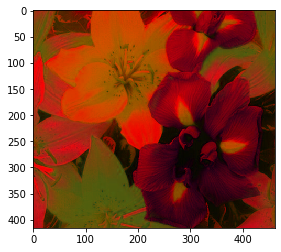

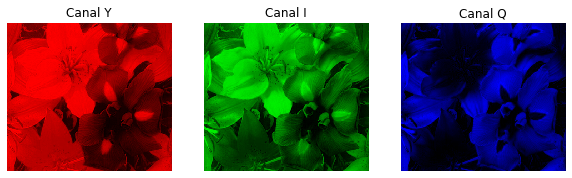

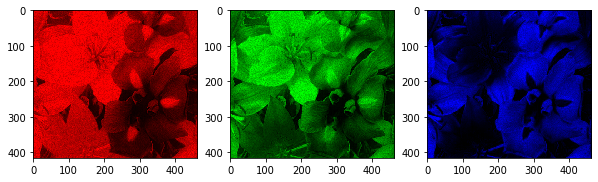

In [17]:
img = rgb2yiq(image)
plt.imshow(img)
plt.show()
fig, [Y,I,Q] = plt.subplots(1, 3, figsize=(10,10))
y = image*np.array([1.0,0.0,0.0])
Y.imshow(y)
Y.set_title('Canal Y')
Y.axis('off')
i = image*np.array([0.0,1.0,0.0])
I.imshow(i)
I.set_title('Canal I')
I.axis('off')
q = image*np.array([0.0,0.0,1.0])
Q.imshow(q)
Q.set_title('Canal Q')
Q.axis('off')
fig, [YY,II,QQ] = plt.subplots(1, 3, figsize=(10,10))
noise =  np.random.normal(loc=0, scale=1, size=img.shape)
noisy4mul = np.clip((y*(1 + noise*0.09)),0,1)
noisy2mul = np.clip((i*(1 + noise*0.09)),0,1)
noisy3mul = np.clip((q*(1 + noise*0.09)),0,1)
YY.imshow(noisy4mul)
II.imshow(noisy2mul)
QQ.imshow(noisy3mul)

In [ ]:



yiqArray = np.zeros((416,462,3), 'uint8')
yiqArray[..., 0] = y*256
yiqArray[..., 1] = i*256
yiqrray[..., 2] = q*256
rgb = Image.fromarray(yiqArray)
print("I1: ",np.shape(y))
print("I1: ",np.shape(rgb))


Construisez une image de la même taille contenant des valeurs aléatoire selon une loi normale. Nommez cette image *bruit* et visualisez-la. Attention pour l'affichage, les valeurs doivent être entre 0 et 1 mais gardez les valeurs non tronqué pour la suite du TP. Vous pouvez copier un tableau numpy tab avec la commande np.array(tab)

Déclarez les variables *bruit0* et *bruit12*. Pour la première, vous ne garderez que la dimension 0 de la matrice *bruit* et vous metterez les deux autes à 0. Pour la deuxième, vous ferez l'inverse. Seule la dimension 0 sera à 0.

Additionnez l'image *yiq* et l'image de *bruit0* multiplié par facteur de bruit de 0.1 puis visualisez les trois canaux de *yiq* dans 3 images.

Convertissez l'image précédente en RGB et affichez là.

Faites de même avec *bruit12*. En comparant les deux types de bruit, que pouvez-vous dire sur la dégradation de l'image que vous percevez ? 

In [5]:
# Écrivez votre code ici.

Répondez à la question ici

5- Bouclage sur l'algorithme des K-moyennes
--------

Reprenez l'algorithme précédent sur les K-moyennes en utilisant un autre espace de couleur (par exemple yiq ou Lab). Notez vos observations. 

In [ ]:
# Écrivez votre code ici.

In [ ]:
# Écrivez votre code ici.

Notez vos observations ici.